# Introducing CNNS with TensorFlow


In this notebook, we're going to see how we can use ```TensorFlow``` to build convolutional neural networks to work with colour image data.

## Load libraries

In [2]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K


__Define plotting function__

In [3]:
def plot_history(H, epochs):
    plt.style.use("seaborn-colorblind")

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()

__Load cifar10 data__

We first want to load the ```cifar-10``` dataset, normalize the values, and then binarize the labels.

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


**Question:** As an experiment, see what happens if you try to train the model with un-scaled images. Does it affect performance?

In [5]:
X_train = X_train/255 #normalize to same size
X_test = X_test/255 #normalize to same size

In [6]:
# create one-hot encodings
lb = LabelBinarizer() # uses one-hot encoding on the labels to make numerical representations of labels
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

We'll also manually create a list of labels for when we come to print the classification report later.

In [7]:
# initialize label names for CIFAR-10 dataset
label_names = ["airplane", "automobile", 
              "bird", "cat", 
              "deer", "dog", 
              "frog", "horse", 
              "ship", "truck"]

## ShallowNet 

We're going to begin by creating one of the simplest CNN architectures with only a single convolutional layer. This type of architecture is known as the ShallowNet architecture:
>INPUT => CONV => ReLU => FC

In [8]:
#initalise model
model = Sequential()

# define CONV => ReLU
model.add(Conv2D(32, #nodes
                (3,3), #kernel size
                padding = "same", # make 0 instead maybe
                input_shape = (32, 32, 3))) # what size of input image they take
model.add(Activation("relu")) #activation function - overcomming vanishing gradients 
          
# FC classifier
model.add(Flatten()) # flatten to a single image embedding array (extracted features)
model.add(Dense(128)) #layer with 128 nodes
model.add(Activation("relu"))
model.add(Dense(10)) #output layer with 10 nodes
model.add(Activation("softmax"))

#the layers are just added one at a time :) 

__Compile model__

We then compile our model using some of the same arguments we've already seen in different contexts.

In [9]:
sgd = SGD(learning_rate =.001)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd,
              metrics=["accuracy"]) #we're optimixing for accuracy 

__Model summary__

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0

the convolutional layer  has only 892 values, while the classification dense layers (fully connected feed forward neural network) have 4194432 values, its because we flatten things into 1 before classification and after convoloution. 

__Plot model__

In [11]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


__Train model__

Finally, we train the model on the data and get our predictions.

In [12]:
H = model.fit(X_train, 
              y_train,
              validation_split=0.1,
              batch_size=32,
              epochs=20,
              verbose=1)

Epoch 1/20
1407/1407 [==============================] - 22s 16ms/step - loss: 2.0457 - accuracy: 0.2770 - val_loss: 1.9486 - val_accuracy: 0.3084
Epoch 2/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.8544 - accuracy: 0.3552 - val_loss: 1.8347 - val_accuracy: 0.3502
Epoch 3/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7809 - accuracy: 0.3798 - val_loss: 1.7935 - val_accuracy: 0.3616
Epoch 4/20
1407/1407 [==============================] - 22s 15ms/step - loss: 1.7264 - accuracy: 0.4004 - val_loss: 1.7252 - val_accuracy: 0.3968
Epoch 5/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6802 - accuracy: 0.4137 - val_loss: 1.7125 - val_accuracy: 0.3936
Epoch 6/20
1407/1407 [==============================] - 22s 15ms/step - loss: 1.6395 - accuracy: 0.4297 - val_loss: 1.6488 - val_accuracy: 0.4252
Epoch 7/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6026 - accuracy: 0.4436 - val_loss: 1.6479 -

__Evaluate model__

In [13]:
predictions = model.predict(X_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step


In [14]:
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.73      0.27      0.40      1000
  automobile       0.60      0.67      0.63      1000
        bird       0.47      0.20      0.28      1000
         cat       0.40      0.36      0.38      1000
        deer       0.41      0.50      0.45      1000
         dog       0.58      0.20      0.30      1000
        frog       0.49      0.68      0.57      1000
       horse       0.47      0.66      0.55      1000
        ship       0.41      0.83      0.55      1000
       truck       0.62      0.51      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.52      0.49      0.47     10000
weighted avg       0.52      0.49      0.47     10000



Comparing these results using convoloutional neural networks with logistic regression and neural network from previous classes, we see that the convolutional neural network performs better :))) 
- simply changing the architecture of the neural network (adding convoloutional layers and pooling layers), makes the model perform better feature extraction (image embeddings) and thus increases accuracy.

However, the model still has a hard time learning to classify the category "bird", and the performance is only just above fitty perciento <3 :)) 

We can also use the ```plot_history()``` function available from ```TensorFlow``` to see how our model performs during training.

These plots can tell us *a lot* about whether a model is under- or over-fiting the data. You read more at [this fantastic blog post](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/). 

Other useful blogs are [here](https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/learning-curve-diagnostics.nb.html) and there's a good video overview [here](https://youtu.be/p3CcfIjycBA).

/tmp/ipykernel_1477/3716877966.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


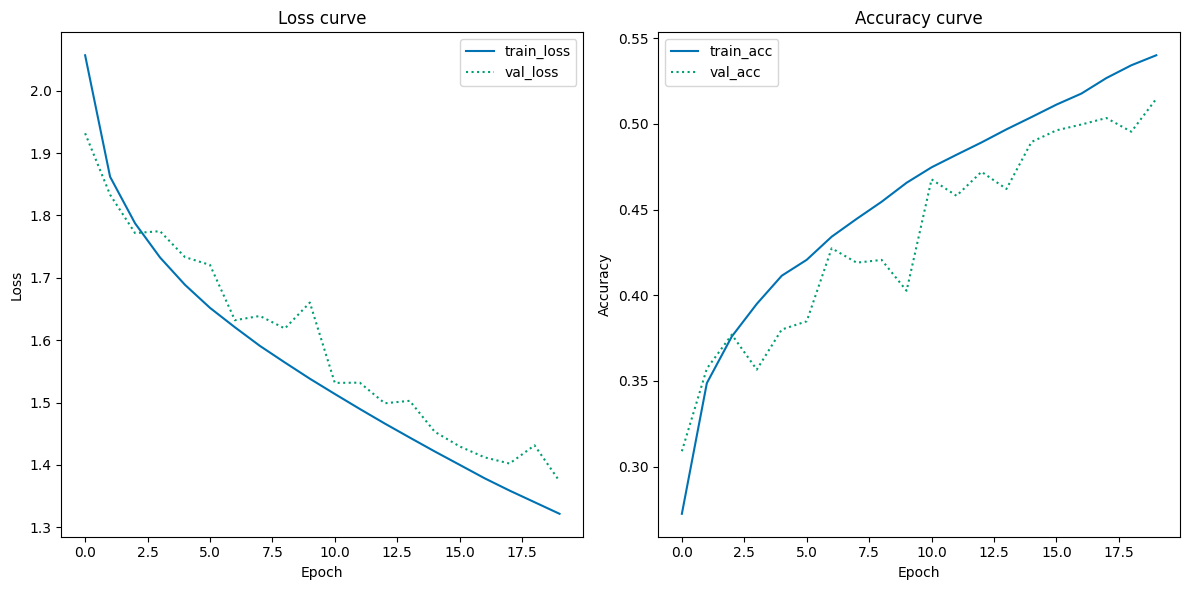

In [16]:
plot_history(H, 20)

right pic:
- increasing epochs might increase accuracy 

left pic: 
- 


training and validataion graphs in both pics: 
- training is improving nicely
- validation is the evaluation and its a bit zig zaggy
- the zig zag =  the split in the data, actually the validations datais a bit off and not representative for the training data. 

all in all : the model is doing very well, but the validation data is not representative (causing zig zags)

## LeNet

Next, we'll look at a slightly more complicated CNN architecture, known as ```LeNet``` after its creator Yann LeCun, who is now Chief AI Scientist at Meta. You can read more [here](https://en.wikipedia.org/wiki/LeNet).
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

__Define model__

In [15]:
# define model
model = Sequential()

# first set of layers CONV => RELU => MAXPOOL
model.add(Conv2D(32, (3,3),
                 padding="same",
                 input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# second set of layers CONV => RELU => MAXPOOL
model.add(Conv2D(50, (5,5),
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [16]:
sgd = SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 50)        40050     
                                                                 
 activation_4 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                  

__Train model__

In [18]:
# train model
H = model.fit(X_train, 
              y_train, 
              validation_split=0.1, 
              batch_size=32,
              epochs=20,
              verbose=1)

Epoch 1/20
1407/1407 [==============================] - 31s 22ms/step - loss: 2.2552 - accuracy: 0.1665 - val_loss: 2.1874 - val_accuracy: 0.2286
Epoch 2/20
1407/1407 [==============================] - 31s 22ms/step - loss: 2.0843 - accuracy: 0.2555 - val_loss: 2.0026 - val_accuracy: 0.2758
Epoch 3/20
1407/1407 [==============================] - 31s 22ms/step - loss: 1.9587 - accuracy: 0.2986 - val_loss: 1.9247 - val_accuracy: 0.3130
Epoch 4/20
1407/1407 [==============================] - 31s 22ms/step - loss: 1.8898 - accuracy: 0.3318 - val_loss: 1.8779 - val_accuracy: 0.3326
Epoch 5/20
1407/1407 [==============================] - 31s 22ms/step - loss: 1.8224 - accuracy: 0.3595 - val_loss: 1.7979 - val_accuracy: 0.3648
Epoch 6/20
1407/1407 [==============================] - 31s 22ms/step - loss: 1.7561 - accuracy: 0.3825 - val_loss: 1.7377 - val_accuracy: 0.3826
Epoch 7/20
1407/1407 [==============================] - 31s 22ms/step - loss: 1.6964 - accuracy: 0.4055 - val_loss: 1.6970 -

/tmp/ipykernel_1338/3716877966.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


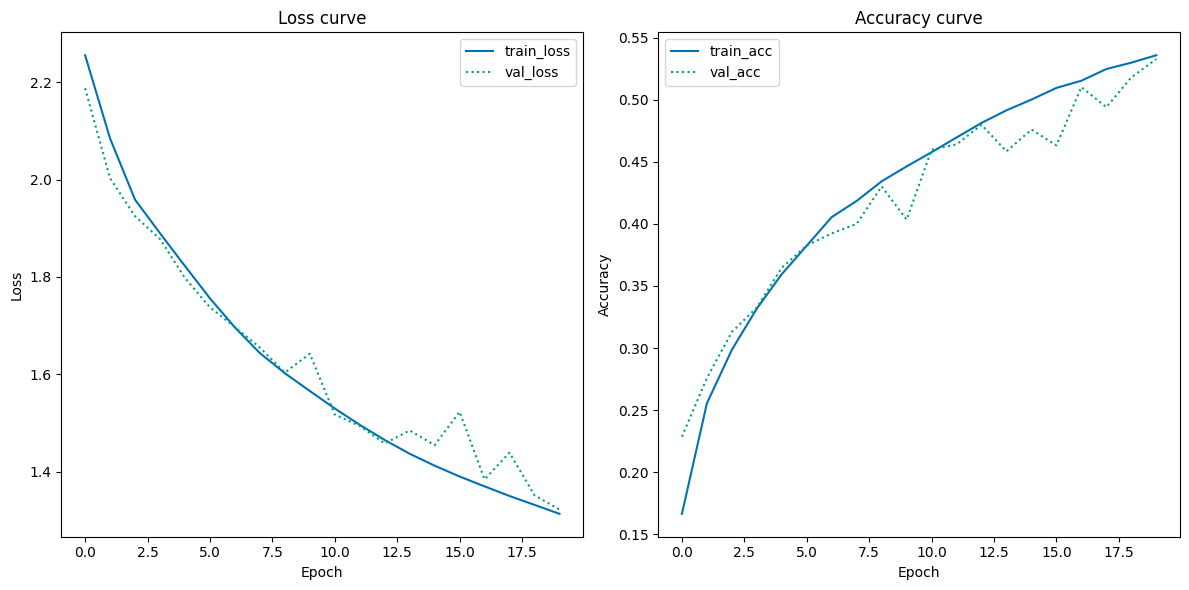

In [19]:
plot_history(H,20)

In [20]:
predictions = model.predict(X_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=label_names))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

    airplane       0.62      0.57      0.60      1000
  automobile       0.62      0.67      0.64      1000
        bird       0.52      0.30      0.38      1000
         cat       0.35      0.37      0.36      1000
        deer       0.45      0.45      0.45      1000
         dog       0.47      0.44      0.45      1000
        frog       0.48      0.76      0.58      1000
       horse       0.59      0.59      0.59      1000
        ship       0.74      0.55      0.63      1000
       truck       0.56      0.62      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.53     10000
weighted avg       0.54      0.53      0.53     10000

